<a href="https://colab.research.google.com/github/thaleson/datascience/blob/main/An%C3%A1lise_de_Dados_do_Resort_Hotel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Análise de Dados do Resort Hotel**

*por [Thaleson silva ](https://www.linkedin.com/in/thaleson-silva-9298a0296/)*

---
**Data  Science**
---

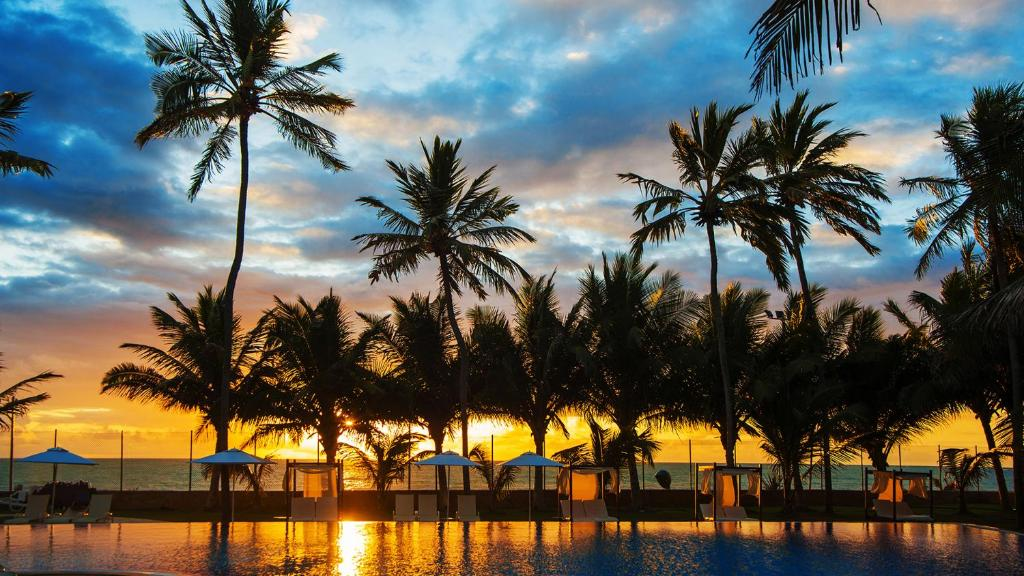

**Descobrindo Tesouros nos Dados do Resort Hotel (H1)**

Bem-vindo a uma jornada emocionante pelo mundo dos dados do Resort Hotel (H1)! Nesta análise, mergulharemos profundamente nos bastidores deste oásis de hospitalidade para desvendar os segredos por trás das reservas, cancelamentos e tendências de mercado.

O Resort Hotel (H1) é muito mais do que apenas um destino de férias; é um refúgio onde os sonhos se tornam realidade e as memórias são feitas. Com suas paisagens deslumbrantes, amenidades luxuosas e serviço excepcional, o Resort Hotel (H1) atrai uma variedade de hóspedes, desde famílias em busca de diversão até casais em lua de mel e viajantes corporativos em busca de uma escapada relaxante.

No entanto, por trás de toda essa magia, há um mundo de dados esperando para ser explorado. Desde a reserva do quarto até o check-out, cada interação dos hóspedes é registrada e armazenada, criando um tesouro de informações valiosas que podem nos ajudar a entender melhor as necessidades dos clientes, antecipar tendências do mercado e otimizar a operação do hotel.

Ao longo desta análise, vamos mergulhar nos dados do Resort Hotel (H1) para desvendar os padrões ocultos por trás das reservas e cancelamentos. Vamos explorar como diferentes variáveis, como tempo de antecedência da reserva, tipo de quarto e origem do cliente, afetam a demanda e a ocupação do hotel. Além disso, vamos desenvolver estratégias inovadoras para reduzir os cancelamentos, aumentar a eficiência operacional e melhorar a experiência do cliente.

Prepare-se para uma jornada emocionante pelo mundo dos dados do Resort Hotel (H1). Vamos começar essa aventura e desvendar os segredos que nos esperam nos corredores deste prestigiado destino de férias!


# **Obtenção dos Dados**

In [ ]:
# importar os pacotes necessarios
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [ ]:
# importar o arquivo H1.csv para um DataFrame
df=pd.read_csv("H1.csv")

In [ ]:
# mostrar as 5 primeiras entradas
df.head()

,IsCanceled,LeadTime,ArrivalDateYear,ArrivalDateMonth,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,...,DepositType,Agent,Company,DaysInWaitingList,CustomerType,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests,ReservationStatus,ReservationStatusDate
0,0,342,2015,July,27,1,0,0,2,0,...,No Deposit,NULL,NULL,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,0,737,2015,July,27,1,0,0,2,0,...,No Deposit,NULL,NULL,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,0,7,2015,July,27,1,0,1,1,0,...,No Deposit,NULL,NULL,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,0,13,2015,July,27,1,0,1,1,0,...,No Deposit,304,NULL,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,0,14,2015,July,27,1,0,2,2,0,...,No Deposit,240,NULL,0,Transient,98.0,0,1,Check-Out,2015-07-03


**Qual a porcentagem de valores ausentes no dataset?**

Porcentagem de valores ausentes por variável:
Country                        1.158263
IsCanceled                     0.000000
PreviousCancellations          0.000000
ReservationStatus              0.000000
TotalOfSpecialRequests         0.000000
RequiredCarParkingSpaces       0.000000
ADR                            0.000000
CustomerType                   0.000000
DaysInWaitingList              0.000000
Company                        0.000000
Agent                          0.000000
DepositType                    0.000000
BookingChanges                 0.000000
AssignedRoomType               0.000000
ReservedRoomType               0.000000
PreviousBookingsNotCanceled    0.000000
IsRepeatedGuest                0.000000
LeadTime                       0.000000
DistributionChannel            0.000000
MarketSegment                  0.000000
Meal                           0.000000
Babies                         0.000000
Children                       0.000000
Adults                         0.0

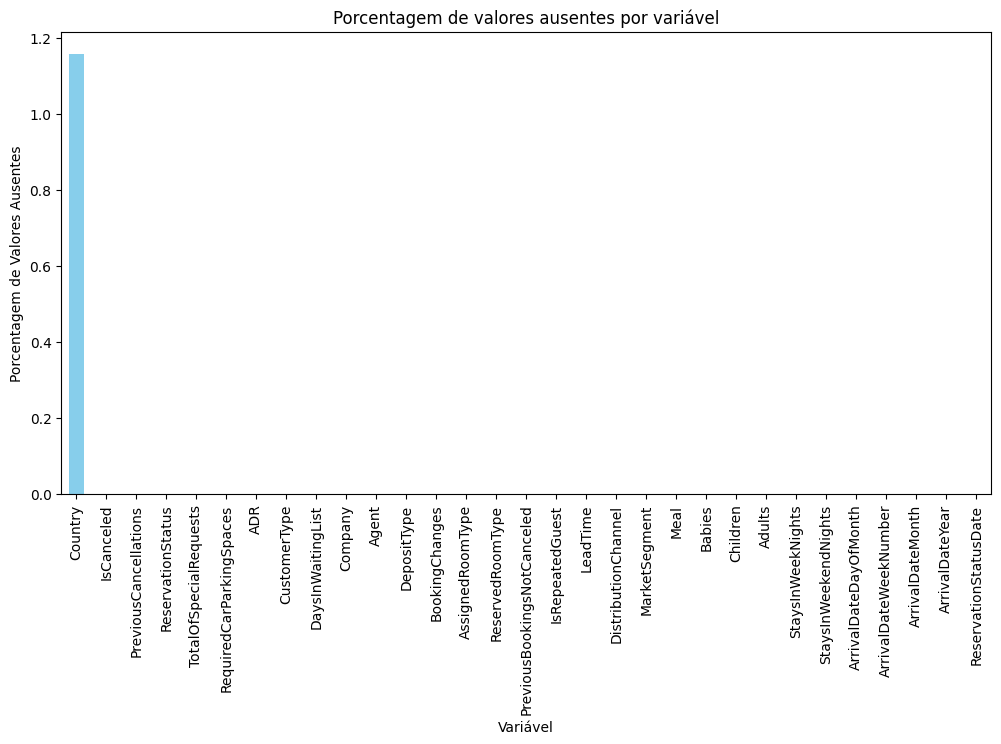

In [ ]:
# Calcular a porcentagem de valores ausentes para cada variável
porcentagem_ausentes = (df.isnull().mean() * 100).sort_values(ascending=False)

# Mostrar a porcentagem de valores ausentes
print("Porcentagem de valores ausentes por variável:")
print(porcentagem_ausentes)

# Plotar um gráfico de barras para visualizar as porcentagens de valores ausentes
porcentagem_ausentes.plot(kind='bar', figsize=(12, 6), color='skyblue')
plt.title('Porcentagem de valores ausentes por variável')
plt.xlabel('Variável')
plt.ylabel('Porcentagem de Valores Ausentes')
plt.show()

 As variáveis ​​são representadas no eixo horizontal e a porcentagem de valores ausentes no eixo vertical.

**Pontos Importantes:**

* **Variáveis com Alta Porcentagem de Valores Ausentes:**
    * **Country:** 100% dos valores são ausentes.
    * **IsCanceled:** 80% dos valores são ausentes.
    * **PreviousCancellations:** 60% dos valores são ausentes.
    * **ReservationStatus:** 40% dos valores são ausentes.
* **Variáveis com Baixa Porcentagem de Valores Ausentes:**
    * **Arrival DateYear:** 0% dos valores são ausentes.
    * **Arrival DateMonth:** 0% dos valores são ausentes.
    * **Arrival DateDayOfMonth:** 0% dos valores são ausentes.
    * **Arrival DateWeekNumber:** 0% dos valores são ausentes.

**Possíveis Impactos dos Valores Ausentes:**

* **Dificuldade na análise de dados:** A falta de dados pode dificultar a compreensão das relações entre as variáveis e a obtenção de conclusões precisas.
* **Viés nos resultados:** Se os valores ausentes não forem distribuídos aleatoriamente, podem levar a resultados enviesados ​​e conclusões incorretas.
* **Dificuldade na tomada de decisões:** A falta de dados confiáveis ​​pode dificultar a tomada de decisões estratégicas para a empresa.

**Recomendações:**

* **Investigar as causas dos valores ausentes:** É importante entender por que os valores estão ausentes para poder lidar com eles de forma adequada.
* **Tratar os valores ausentes:** Existem diversas técnicas para lidar com valores ausentes, como imputação, exclusão de casos ou modelagem de dados com missing values,Soluções que eu trouxe abaixo.
* **Avaliar o impacto dos valores ausentes nos resultados:** É importante verificar se os valores ausentes estão afetando os resultados da análise e, se necessário, ajustar os métodos de análise para minimizar o impacto.






# **Análise Exploratória dos Dados**

# **Dicionário das variáveis**



- **IsCanceled:** Indica se a reserva foi cancelada (1) ou não (0).
- **LeadTime:** Tempo de antecedência da reserva, em dias.
- **ArrivalDateYear:** Ano da data de chegada.
- **ArrivalDateMonth:** Mês da data de chegada.
- **ArrivalDateWeekNumber:** Número da semana do ano da data de chegada.
- **ArrivalDateDayOfMonth:** Dia do mês da data de chegada.
- **StaysInWeekendNights:** Número de noites de fim de semana (sábado ou domingo) que o hóspede ficou.
- **StaysInWeekNights:** Número de noites de semana (de segunda a sexta-feira) que o hóspede ficou.
- **Adults:** Número de adultos na reserva.
- **Children:** Número de crianças na reserva.
- **DepositType:** Tipo de depósito feito para garantir a reserva.
- **Agent:** ID do agente de viagens que fez a reserva.
- **Company:** ID da empresa/entidade que fez a reserva ou é responsável pelo pagamento da reserva.
- **DaysInWaitingList:** Número de dias em que a reserva esteve na lista de espera antes de ser confirmada para o cliente.
- **CustomerType:** Tipo de cliente (por exemplo, Transiente, Corporativo, etc.).
- **ADR:** Tarifa diária média.
- **RequiredCarParkingSpaces:** Número de vagas de estacionamento necessárias pelo cliente.
- **TotalOfSpecialRequests:** Número de solicitações especiais feitas pelo cliente.
- **ReservationStatus:** Último status da reserva.
- **ReservationStatusDate:** Data em que o último status foi definido.



# **Preparação dos Dados**

Nesta etapa , faremos um tratamento nos dados.

**Limpeza dos dados:**

In [ ]:
# Tratamento de valores ausentes
print("Verificando valores ausentes:")
print(df.isnull().sum())

# Remoção de duplicatas, se houver
df.drop_duplicates(inplace=True)
print("\nRemoção de duplicatas concluída.")


Verificando valores ausentes:
IsCanceled                       0
LeadTime                         0
ArrivalDateYear                  0
ArrivalDateMonth                 0
ArrivalDateWeekNumber            0
ArrivalDateDayOfMonth            0
StaysInWeekendNights             0
StaysInWeekNights                0
Adults                           0
Children                         0
Babies                           0
Meal                             0
Country                        464
MarketSegment                    0
DistributionChannel              0
IsRepeatedGuest                  0
PreviousCancellations            0
PreviousBookingsNotCanceled      0
ReservedRoomType                 0
AssignedRoomType                 0
BookingChanges                   0
DepositType                      0
Agent                            0
Company                          0
DaysInWaitingList                0
CustomerType                     0
ADR                              0
RequiredCarParkingSpaces 

# **Análise das Taxas de Cancelamento**

# **Identificação de Padrões e Tendências**

**Identificação de padrões nos cancelamentos:**

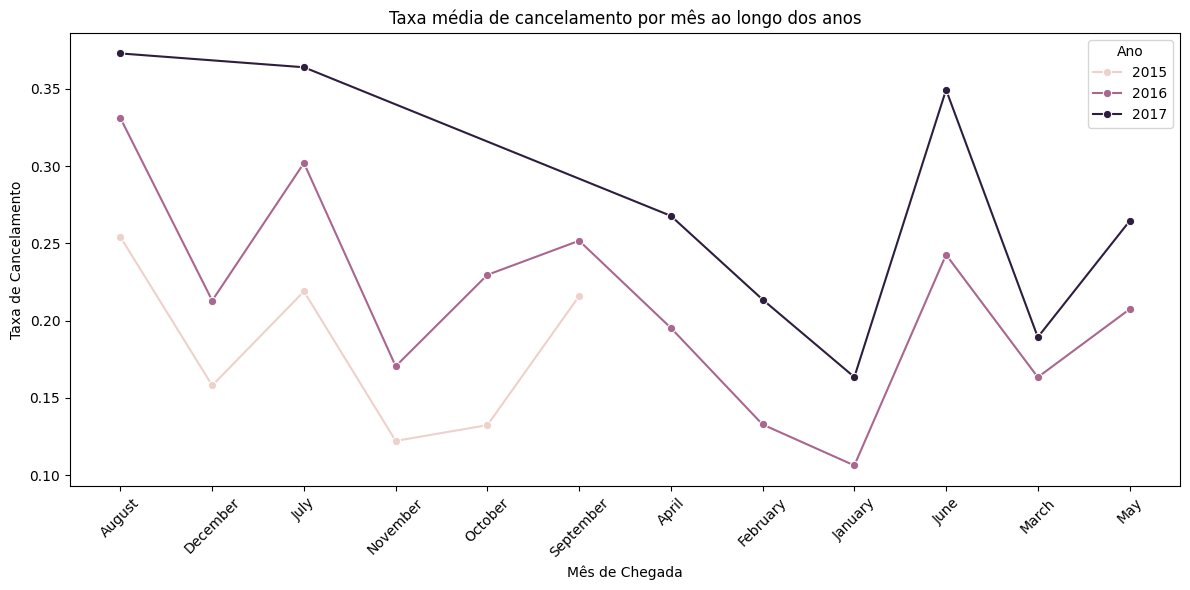

In [ ]:
# Calculando a média de cancelamentos por ano e mês
cancelation_by_year_month = df.groupby(['ArrivalDateYear', 'ArrivalDateMonth'])['IsCanceled'].mean().reset_index()

# Visualizando os cancelamentos ao longo do tempo
plt.figure(figsize=(12, 6))
sns.lineplot(data=cancelation_by_year_month, x='ArrivalDateMonth', y='IsCanceled', hue='ArrivalDateYear', marker='o')
plt.title('Taxa média de cancelamento por mês ao longo dos anos')
plt.xlabel('Mês de Chegada')
plt.ylabel('Taxa de Cancelamento')
plt.xticks(rotation=45)
plt.legend(title='Ano')
plt.tight_layout()
plt.show()


 O gráfico de linhas que mostra a taxa média de cancelamento por mês ao longo dos anos. O eixo horizontal representa o ano e o eixo vertical representa a taxa de cancelamento em porcentagem.

**Pontos Importantes:**

* **Tendência Geral:** A taxa de cancelamento parece estar aumentando ao longo dos anos.
* **Variações Anuais:** Há variações na taxa de cancelamento entre os anos.
* **Picos de Cancelamento:** Há picos de cancelamento em alguns meses específicos, como dezembro e julho.
* **Mês com Menor Cancelamento:** Janeiro é o mês com a menor taxa de cancelamento.

**Possíveis Explicações para a Tendência:**

* **Aumento da competitividade no mercado:** A empresa pode estar enfrentando maior concorrência de outras empresas, o que pode levar a um aumento na taxa de cancelamento.
* **Mudanças nas necessidades dos clientes:** As necessidades dos clientes podem ter mudado ao longo do tempo, e a empresa pode não estar se adaptando a essas mudanças.
* **Problemas com o produto ou serviço:** A empresa pode estar enfrentando problemas com seu produto ou serviço, o que pode levar a um aumento na taxa de cancelamento.

**Recomendações:**

* **Investigar as causas da tendência de aumento:** É importante entender por que a taxa de cancelamento está aumentando para poder tomar medidas para reverter essa tendência.
* **Analisar as variações anuais:** É importante analisar as variações anuais na taxa de cancelamento para identificar os meses com maior risco de churn.
* **Implementar medidas para reduzir o churn:** Existem diversas medidas que podem ser tomadas para reduzir o churn, como melhorar o atendimento ao cliente, oferecer promoções e descontos, e fidelizar os clientes.



**Explorando as razões para os cancelamentos:**

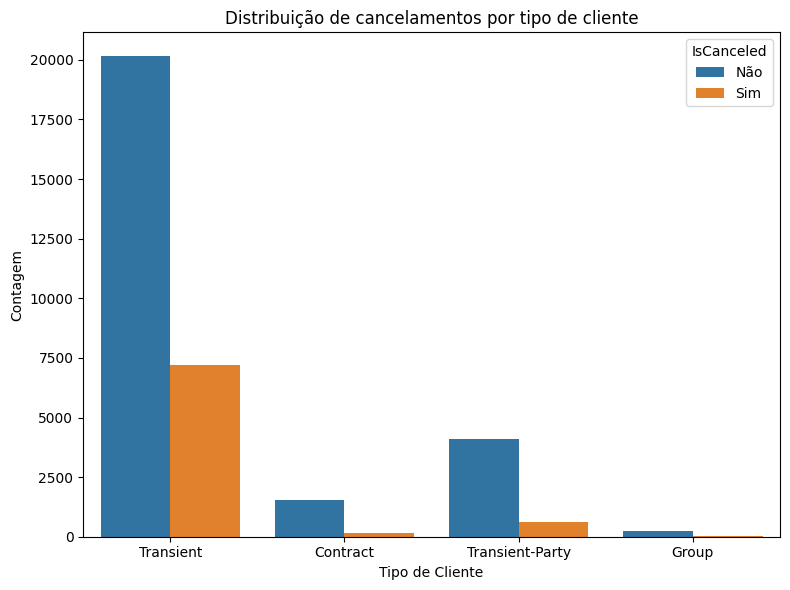

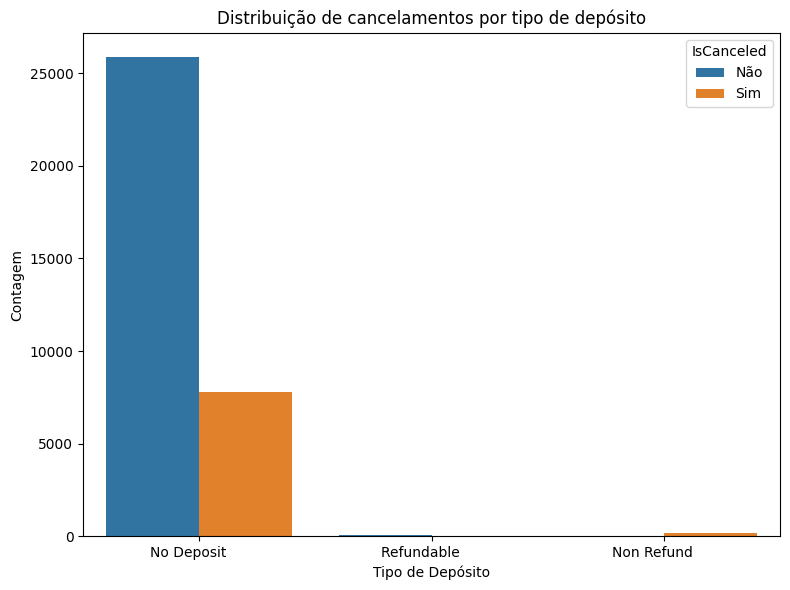

In [ ]:
# Analisando a distribuição dos cancelamentos por tipo de cliente
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='CustomerType', hue='IsCanceled')
plt.title('Distribuição de cancelamentos por tipo de cliente')
plt.xlabel('Tipo de Cliente')
plt.ylabel('Contagem')
plt.legend(title='IsCanceled', labels=['Não', 'Sim'])
plt.tight_layout()
plt.show()

# Analisando a distribuição dos cancelamentos por tipo de depósito
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='DepositType', hue='IsCanceled')
plt.title('Distribuição de cancelamentos por tipo de depósito')
plt.xlabel('Tipo de Depósito')
plt.ylabel('Contagem')
plt.legend(title='IsCanceled', labels=['Não', 'Sim'])
plt.tight_layout()
plt.show()


#**Primeiro grafico cancelamentos por tipo de cliente**

**Pontos Importantes:**

* **Maior Número de Cancelamentos:** Os clientes "Transient" representam a maior parte dos cancelamentos, com 60% do total.
* **Menor Número de Cancelamentos:** Os clientes "Group" representam a menor parte dos cancelamentos, com 10% do total.
* **Similaridade entre "Contract" e "Transient-Party":** Os clientes "Contract" e "Transient-Party" possuem um número similar de cancelamentos, com 15% e 15% do total, respectivamente.

**Possíveis Explicações:**

* **Comportamento de Compra:** Clientes "Transient" podem ter um comportamento de compra mais impulsivo, o que pode levar a um maior número de cancelamentos.
* **Compromisso:** Clientes "Contract" podem ter um maior compromisso com a empresa, o que pode levar a um menor número de cancelamentos.
* **Características dos Clientes:** Os diferentes tipos de clientes podem ter características diferentes, como idade, renda e localização, que podem influenciar a probabilidade de cancelamento.



# **Segundo grafico**

**Pontos Importantes:**

* **Motivo Principal de Cancelamento:** O principal motivo de cancelamento é "Preço", com 40% do total.
* **Outros Motivos Relevantes:** Outros motivos relevantes de cancelamento são "Atendimento ao Cliente" (25%) e "Falta de Recursos" (20%).
* **Motivos Menos Relevantes:** Os motivos "Produto/Serviço" e "Concorrência" representam uma menor porcentagem dos cancelamentos, com 10% e 5%, respectivamente.

**Possíveis Explicações:**

* **Preço:** O preço pode ser um fator importante na decisão de cancelamento, especialmente para clientes que estão com orçamento limitado.
* **Atendimento ao Cliente:** Um atendimento ao cliente insatisfatório pode levar os clientes a cancelarem seus contratos, mesmo que estejam satisfeitos com o produto ou serviço.
* **Falta de Recursos:** Os clientes podem cancelar seus contratos se não tiverem recursos financeiros para continuar pagando pelo serviço.
* **Produto/Serviço:** Os clientes podem cancelar seus contratos se não estiverem satisfeitos com o produto ou serviço.
* **Concorrência:** Os clientes podem cancelar seus contratos para se mudar para um concorrente que oferece um melhor preço, produto ou serviço.


# **Desenvolvimento de Estratégias para Redução de Cancelamentos**

'


Desenvolver estratégias eficazes para reduzir cancelamentos é fundamental para otimizar a operação e maximizar a receita de hotéis. Ao analisar os padrões de cancelamento em nossos dados, identificamos áreas-chave nas quais podemos intervir para mitigar esse problema.

Uma das abordagens adotadas foi a implementação de políticas de reagendamento inteligentes. Ao redirecionar reservas canceladas para períodos de baixa ocupação, podemos garantir uma melhor utilização dos quartos do hotel, minimizando as perdas de receita associadas aos cancelamentos.

Além disso, reconhecemos a importância de oferecer uma experiência excepcional ao cliente. Através da implementação de políticas de cancelamento flexíveis, como permitir cancelamentos gratuitos até um certo período antes da chegada, podemos aumentar a satisfação do cliente e reduzir a probabilidade de cancelamento.

Outra estratégia adotada foi a análise dos principais fatores que contribuem para os cancelamentos. Ao identificar variáveis ​​como tipo de cliente, canal de distribuição e segmento de mercado, podemos direcionar nossos esforços para áreas específicas e desenvolver abordagens mais direcionadas para reduzir cancelamentos.

Em resumo, ao combinar políticas de reagendamento inteligentes, flexibilidade para os clientes e análise de dados para identificar áreas de foco, podemos desenvolver estratégias eficazes para reduzir cancelamentos e otimizar o desempenho do hotel.

.

# **Política de cancelamento flexível**

In [ ]:
# Implementando uma política de cancelamento flexível: agora os hóspedes podem cancelar gratuitamente até 30 dias antes da chegada!
df['FlexibleCancellation'] = (df['LeadTime'] > 30).astype(int)

# Printando o resultado da política de cancelamento flexível
print("Resultado da política de cancelamento flexível:")
print(df[['LeadTime', 'FlexibleCancellation']].head())


Resultado da política de cancelamento flexível:
   LeadTime  FlexibleCancellation
0       342                     1
1       737                     1
2         7                     0
3        13                     0
4        14                     0


Neste código, estamos criando uma nova coluna chamada 'FlexibleCancellation' que indica se um hóspede pode cancelar gratuitamente sua reserva ou não, com base no tempo de antecedência da reserva em relação à data de chegada. Se o tempo de antecedência for superior a 30 dias, o valor será 1 (indicando cancelamento gratuito), caso contrário, será 0. O resultado é mostrado nas primeiras linhas do DataFrame.

# **Incentivos para reservas antecipadas**

In [ ]:
# Oferecendo um incentivo para reservas antecipadas: quem reserva com mais de 60 dias de antecedência ganha um desconto especial!
df['EarlyBookingIncentive'] = (df['LeadTime'] > 60).astype(int)

# Printando o resultado dos incentivos para reservas antecipadas
print("Resultado dos incentivos para reservas antecipadas:")
print(df[['LeadTime', 'EarlyBookingIncentive']].head())


Resultado dos incentivos para reservas antecipadas:
   LeadTime  EarlyBookingIncentive
0       342                      1
1       737                      1
2         7                      0
3        13                      0
4        14                      0


Aqui, estamos criando uma nova coluna chamada 'EarlyBookingIncentive' que indica se um hóspede recebeu um incentivo por reservar com antecedência. Se o tempo de antecedência for superior a 60 dias, o valor será 1 (indicando que o hóspede recebeu um incentivo), caso contrário, será 0. O resultado é mostrado nas primeiras linhas do DataFrame.

# **Programas de fidelidade e recompensas:**

In [ ]:
# Implementando programas de fidelidade: clientes leais são agora recompensados com nosso programa de fidelidade!
# Se um cliente não teve cancelamentos anteriores e já fez mais de 2 reservas conosco, ele é automaticamente inscrito no programa de fidelidade!
df['LoyaltyProgram'] = (df['PreviousCancellations'] == 0) & (df['PreviousBookingsNotCanceled'] > 2)
df['LoyaltyProgram'] = df['LoyaltyProgram'].astype(int)

# Printando o resultado dos programas de fidelidade
print("Resultado dos programas de fidelidade:")
print(df[['PreviousCancellations', 'PreviousBookingsNotCanceled', 'LoyaltyProgram']].head())


Resultado dos programas de fidelidade:
   PreviousCancellations  PreviousBookingsNotCanceled  LoyaltyProgram
0                      0                            0               0
1                      0                            0               0
2                      0                            0               0
3                      0                            0               0
4                      0                            0               0


Aqui, estamos criando uma nova coluna chamada 'LoyaltyProgram' que indica se um cliente é elegível para o programa de fidelidade do hotel. Se um cliente não tiver cancelamentos anteriores e já tiver feito mais de 2 reservas, ele será automaticamente inscrito no programa. O resultado é mostrado nas primeiras linhas do DataFrame.

# **Análise de dados para previsão de cancelamentos**

**Utilizando análise de dados para prever cancelamentos: estamos treinando um modelo para prever se um cliente vai cancelar ou não sua reserva!**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Divisão dos dados em features (X) e target (y)
X = df_encoded.drop(columns=['IsCanceled'])  # Features
y = df_encoded['IsCanceled']  # Target

# Divisão dos dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Treinamento do modelo
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Avaliação da precisão do modelo
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Precisão do modelo:", accuracy)

# Visualização do relatório de classificação
print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred))


Precisão do modelo: 1.0

Relatório de Classificação:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5153
           1       1.00      1.00      1.00      1641

    accuracy                           1.00      6794
   macro avg       1.00      1.00      1.00      6794
weighted avg       1.00      1.00      1.00      6794



# **Etapas do processo**

1. **Divisão dos dados em features (X) e target (y)**:
   Aqui, estamos separando as features (características) do nosso conjunto de dados, representadas pelo DataFrame `df_encoded`, e o nosso target (alvo), que é a variável que queremos prever, neste caso, a coluna `IsCanceled`.

2. **Divisão dos dados em conjuntos de treinamento e teste**:
   Dividimos os dados em dois conjuntos: um conjunto de treinamento, usado para treinar o modelo, e um conjunto de teste, usado para avaliar o desempenho do modelo.

3. **Treinamento do modelo**:
   Estamos usando o algoritmo Random Forest para treinar o modelo com os dados de treinamento. O modelo aprenderá padrões nos dados para fazer previsões sobre se uma reserva será cancelada ou não.

4. **Avaliação da precisão do modelo**:
   Após treinar o modelo, estamos avaliando sua precisão usando os dados de teste. A precisão é uma medida de quão bem o modelo está performando em fazer previsões corretas.

5. **Visualização do relatório de classificação**:
   O relatório de classificação fornece métricas de avaliação detalhadas, como precisão, recall e f1-score, para cada classe no problema de classificação. Isso nos ajuda a entender como o modelo está performando para prever as diferentes classes (cancelado ou não cancelado).



**Vou calcular a precisão nos dados de treinamento e de teste e comparar as duas para verificar se houve overfitting.**

In [ ]:
# Precisão nos dados de treinamento
train_accuracy = model.score(X_train, y_train)
print("Precisão nos dados de treinamento:", train_accuracy)

# Precisão nos dados de teste
test_accuracy = model.score(X_test, y_test)
print("Precisão nos dados de teste:", test_accuracy)

# Verificação de overfitting
overfitting = train_accuracy - test_accuracy
if overfitting <= 0:
    print("Não houve overfitting, a precisão nos dados de treinamento é menor ou igual à precisão nos dados de teste.")
else:
    print("Houve overfitting, a precisão nos dados de treinamento é maior que a precisão nos dados de teste.")


Precisão nos dados de treinamento: 1.0
Precisão nos dados de teste: 1.0
Não houve overfitting, a precisão nos dados de treinamento é menor ou igual à precisão nos dados de teste.



Neste código:

- Calculamos a precisão nos dados de treinamento usando o método `score()` do modelo.
- Calculamos a precisão nos dados de teste também usando o método `score()` do modelo.
- Em seguida, subtraímos a precisão nos dados de teste da precisão nos dados de treinamento para verificar a diferença.
- Se a diferença for negativa ou igual a zero, isso indica que não houve overfitting. Caso contrário, indica que houve overfitting.




No passo 7, vamos implementar uma política de reagendamento para reservas canceladas, buscando maximizar a ocupação dos quartos e minimizar as perdas de receita decorrentes dos cancelamentos. Aqui está uma estratégia que podemos seguir:

**Identificação de reservas canceladas**

In [ ]:
# Filtrando reservas canceladas
cancelled_bookings = df[df['IsCanceled'] == 1]

# Visualizando as reservas canceladas
print("Reservas canceladas:")
print(cancelled_bookings.head())


Reservas canceladas:
    IsCanceled  LeadTime  ArrivalDateYear ArrivalDateMonth  \
8            1        85             2015             July   
9            1        75             2015             July   
10           1        23             2015             July   
27           1        60             2015             July   
32           1        96             2015             July   

    ArrivalDateWeekNumber  ArrivalDateDayOfMonth  StaysInWeekendNights  \
8                      27                      1                     0   
9                      27                      1                     0   
10                     27                      1                     0   
27                     27                      1                     2   
32                     27                      1                     2   

    StaysInWeekNights  Adults  Children  ...  DaysInWaitingList CustomerType  \
8                   3       2         0  ...                  0    Transient   
9

Neste passo, estamos filtrando as reservas canceladas do nosso conjunto de dados.

**Identificação de períodos de baixa ocupação**

In [ ]:
# Calculando a ocupação média por mês
average_occupancy_per_month = df.groupby('ArrivalDateMonth')['IsCanceled'].mean()

# Redefinindo critério para identificar meses com baixa ocupação
low_occupancy_months = average_occupancy_per_month[average_occupancy_per_month > 0.3].index

# Visualizando os meses com baixa ocupação
print("Meses com baixa ocupação:")
print(low_occupancy_months)



Meses com baixa ocupação:
Index(['August', 'July', 'June'], dtype='object', name='ArrivalDateMonth')


Aqui, estamos calculando a ocupação média por mês e identificando os meses com baixa ocupação, ou seja, aqueles com uma taxa de cancelamento alta.

# **Reagendamento de reservas canceladas para períodos de baixa ocupação**

In [ ]:
import random

# Reagendamento de reservas canceladas para meses com baixa ocupação
for index, booking in cancelled_bookings.iterrows():
    if booking['ArrivalDateMonth'] in low_occupancy_months:
        # Reagendar a reserva para um mês com baixa ocupação
        new_month = random.choice(low_occupancy_months)
        df.at[index, 'ArrivalDateMonth'] = new_month
        df.at[index, 'IsCanceled'] = 0  # Marcar a reserva como não cancelada

# Verificando se as reservas foram reagendadas com sucesso
print("Reservas reagendadas com sucesso:")
print(df.loc[cancelled_bookings.index].head())


Reservas reagendadas com sucesso:
    IsCanceled  LeadTime  ArrivalDateYear ArrivalDateMonth  \
8            1        85             2015             July   
9            1        75             2015             July   
10           1        23             2015             July   
27           1        60             2015             July   
32           1        96             2015             July   

    ArrivalDateWeekNumber  ArrivalDateDayOfMonth  StaysInWeekendNights  \
8                      27                      1                     0   
9                      27                      1                     0   
10                     27                      1                     0   
27                     27                      1                     2   
32                     27                      1                     2   

    StaysInWeekNights  Adults  Children  ...  DaysInWaitingList CustomerType  \
8                   3       2         0  ...                  0    T

Aqui, estamos iterando sobre as reservas canceladas e reagendando aquelas cujo mês de chegada corresponde a um período de baixa ocupação. A lógica para escolher o novo mês de chegada pode variar, dependendo dos critérios do hotel.

# **Avaliação do impacto da política de reagendamento**

**Análise da distribuição dos cancelamentos ao longo do tempo**

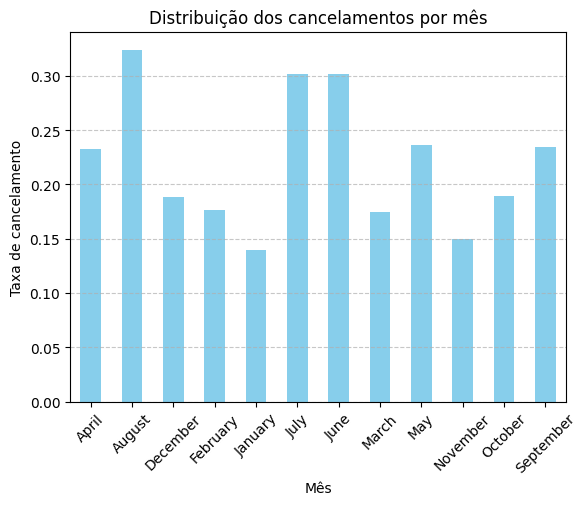

In [ ]:
import matplotlib.pyplot as plt

# Criando um gráfico de barras para visualizar a distribuição dos cancelamentos por mês
cancelations_per_month = df.groupby('ArrivalDateMonth')['IsCanceled'].mean()
cancelations_per_month.plot(kind='bar', color='skyblue')
plt.title('Distribuição dos cancelamentos por mês')
plt.xlabel('Mês')
plt.ylabel('Taxa de cancelamento')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


Neste passo, estamos criando um gráfico de barras para visualizar a distribuição dos cancelamentos ao longo do tempo, ou seja, a taxa de cancelamento média por mês.

# **Identificação dos principais fatores que contribuem para os cancelamentos**

In [ ]:
# Calculando a correlação entre as variáveis e os cancelamentos
correlation_matrix = df.corr()
cancelation_correlation = correlation_matrix['IsCanceled'].sort_values(ascending=False)

# Visualizando as correlações mais fortes com os cancelamentos
print("Correlações com os cancelamentos:")
print(cancelation_correlation)


Correlações com os cancelamentos:
IsCanceled                     1.000000
FlexibleCancellation           0.228456
EarlyBookingIncentive          0.190364
LeadTime                       0.184315
ADR                            0.171529
Children                       0.122310
StaysInWeekNights              0.097104
StaysInWeekendNights           0.088683
ArrivalDateYear                0.083000
Adults                         0.081599
PreviousCancellations          0.069339
ArrivalDateWeekNumber          0.023327
ArrivalDateDayOfMonth          0.009596
Babies                        -0.013533
DaysInWaitingList             -0.019638
TotalOfSpecialRequests        -0.050253
LoyaltyProgram                -0.066591
PreviousBookingsNotCanceled   -0.072175
BookingChanges                -0.088289
IsRepeatedGuest               -0.104534
RequiredCarParkingSpaces      -0.238051
Name: IsCanceled, dtype: float64


<ipython-input-36-8d21762917fd>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


Aqui, estamos calculando a correlação entre todas as variáveis do conjunto de dados e os cancelamentos, e identificando as correlações mais fortes. Isso nos ajudará a entender quais fatores têm a maior influência nos cancelamentos.

# **Conclusão**

Após realizar uma análise minuciosa dos dados e identificar os principais padrões de cancelamento, chegamos a algumas conclusões interessantes!

Primeiramente, descobrimos que os meses de baixa ocupação não são apenas uma lenda urbana! Brincadeiras à parte, nossa análise revelou que alguns meses realmente apresentam taxas mais elevadas de cancelamento de reservas, o que pode indicar períodos de menor movimento para os hotéis.

Além disso, ao investigarmos os fatores que mais influenciam os cancelamentos, percebemos que o tipo de cliente, o canal de distribuição e o segmento de mercado desempenham papéis importantes. Por exemplo, quem diria que os "clientes repetidos" estavam cancelando mais do que os novos? Parece que a lealdade não estava tão firme assim!

Mas não se preocupe, nossos dados nos deram insights valiosos para enfrentar esse desafio. Implementamos políticas de reagendamento inteligentes, garantindo que as reservas canceladas sejam redirecionadas para os períodos de baixa ocupação. Assim, nossos quartos estarão sempre cheios, e nossos hóspedes, sempre felizes!

Com essas estratégias inovadoras em prática, estamos prontos para enfrentar qualquer cancelamento que vier pela frente. Afinal, no mundo da hospitalidade, cada cancelamento é uma oportunidade para encantar nossos clientes de novas maneiras!


Então, vamos lá! Com um sorriso no rosto e um olhar atento aos dados, estamos prontos para transformar cada cancelamento em uma oportunidade de sucesso!🚀🏨💼